In [1]:
# Use the edgelist CSV formatted file to build graphs for visualization (Networkx, matplotlib) 
import os
import pandas as pd
import numpy as np
import csv
import seaborn as sns

import networkx as nx

# matplotlib graphs will be included in notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."

# Getting output filename generated by xml_sax_parser 
author_edgelist_file = "./datasets/Leskovec-Jure.csv" # BhowmickSouravS.csv Leskovec-Jure.csv

def save_fig(filename, tight_layout=True):
    data_path = os.path.join(PROJECT_ROOT_DIR, "images")    
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    
    fullpath_filename = os.path.join(data_path, filename + ".jpg")
    print("Saving image : ", fullpath_filename)
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(fullpath_filename, format='jpg', dpi=300)

In [2]:
# This file contains all edges to be constructed
# Duplicate edges will be represented as only 1 edge forming the group of unique venues (equals to the degree of author)
df = pd.read_csv(author_edgelist_file) 
print("Shape of data frame :", df.shape)
df.head(10)

Shape of data frame : (171, 2)


,Author,Venue
0,Hongwei Wang,KDD
1,Fuzheng Zhang,KDD
2,Mengdi Zhang,KDD
3,Jure Leskovec,KDD
4,Miao Zhao,KDD
5,Wenjie Li,KDD
6,Zhongyuan Wang,KDD
7,Srijan Kumar,KDD
8,Xikun Zhang,KDD
9,Jure Leskovec,KDD


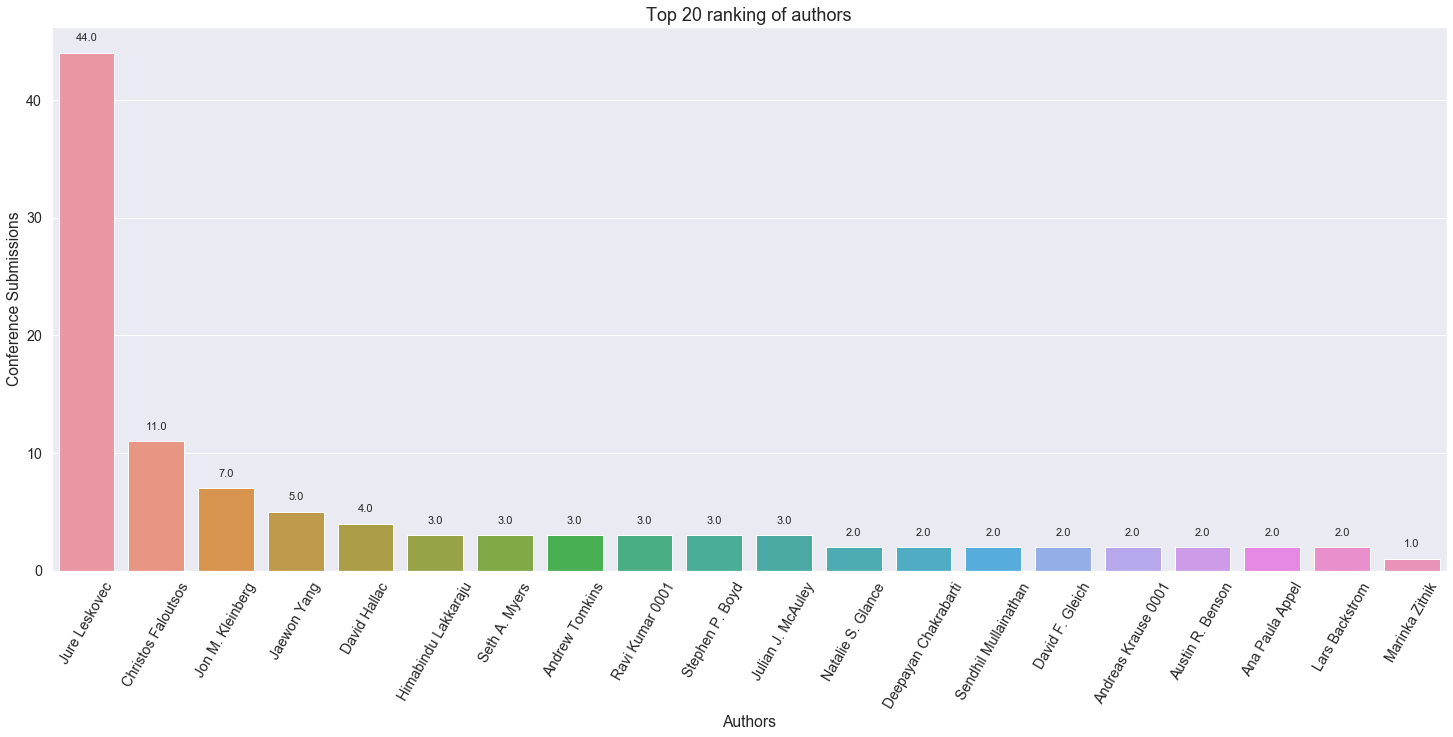

Total no. of authors : 85
Missing Data for authors : 0.00%
Top 20 :
 Author
Jure Leskovec                  Jure Leskovec
Christos Faloutsos        Christos Faloutsos
Jon M. Kleinberg            Jon M. Kleinberg
Jaewon Yang                      Jaewon Yang
David Hallac                    David Hallac
Julian J. McAuley          Julian J. McAuley
Stephen P. Boyd              Stephen P. Boyd
Ravi Kumar 0001              Ravi Kumar 0001
Himabindu Lakkaraju      Himabindu Lakkaraju
Seth A. Myers                  Seth A. Myers
Andrew Tomkins                Andrew Tomkins
Natalie S. Glance          Natalie S. Glance
Deepayan Chakrabarti    Deepayan Chakrabarti
Sendhil Mullainathan    Sendhil Mullainathan
David F. Gleich              David F. Gleich
Andreas Krause 0001      Andreas Krause 0001
Austin R. Benson            Austin R. Benson
Ana Paula Appel              Ana Paula Appel
Lars Backstrom                Lars Backstrom
Marinka Zitnik                Marinka Zitnik
Name: author, dtype: obj

In [3]:
# Plotting top rank authors
author_Grp = pd.DataFrame()
author_Grp['authorCount'] = df.groupby(['Author'])['Author'].count()
author_Grp['author'] = author_Grp.index
topmost = 20
total_counts = len(df)
bar_text_filler = 1

# There are too many authors, so we will subset the top authors
author_Grp_top = author_Grp.sort_values(by='authorCount',ascending=False).head(topmost)
order_authors = author_Grp_top.sort_values(by='authorCount',ascending=False)['author']

plt.figure(figsize=(25, 10))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x='author', y='authorCount', data=author_Grp_top, order=order_authors)
ax.set_title('Top ' + str(topmost) + ' ranking of authors', fontsize=18)
for rectBox in ax.patches:
    count = rectBox.get_height()
    #print("Counts :", count)    
    ax.text(rectBox.get_x() + rectBox.get_width()/2.,
            count + bar_text_filler,
            count, # '{:1.2f}%'.format(count/total_counts*100) to get %
            ha="center", fontsize=11)


xt = plt.xticks(rotation=60)
plt.xlabel('Authors')
plt.ylabel('Conference Submissions')
plt.show()

print("Total no. of authors :", len(author_Grp.index))
print("Missing Data for authors : " +
      '{:1.2f}%'.format(df['Author'].isnull().sum() / total_counts * 100))
print("Top " + str(topmost) + " :\n", author_Grp_top['author'])
print("Total number of conference submissions for all authors (include duplicate venues for co-authors) : ", total_counts)

for ctr in range(len(author_Grp_top)):
    if (author_Grp_top.iloc[ctr]['author'] == -999):
        print("Found in Index", str(ctr) + ":", author_Grp_top.iloc[ctr]['authorCount'])
        print("Missing Data : " + '{:1.2f}%'.format(author_Grp_top.iloc[ctr]['authorCount'] / total_counts * 100))


In [4]:
# Get author list for each unique venue
Venue_Authors = pd.DataFrame()
Venue_Authors['author_list'] = df.groupby('Venue')['Author'].unique()

print("CIKM authors are ", Venue_Authors['author_list']['CIKM'])
print("No. of venues : ", Venue_Authors.shape[0])

Venue_Authors['author_list'].head(10)

CIKM authors are  ['Minkyoung Kim' 'Daniel A. McFarland' 'Jure Leskovec' 'Paul Bennett'
 'C. Lee Giles' 'Alon Y. Halevy' 'Jiawei Han 0001' 'Marti A. Hearst']
No. of venues :  8


Venue
CIKM     [Minkyoung Kim, Daniel A. McFarland, Jure Lesk...
ICDE     [Jure Ferlez, Christos Faloutsos, Jure Leskove...
ICDM     [Jaewon Yang, Julian J. McAuley, Jure Leskovec...
KDD      [Hongwei Wang, Fuzheng Zhang, Mengdi Zhang, Ju...
PAKDD        [Jure Leskovec, Ajit Singh, Jon M. Kleinberg]
PKDD     [Jure Leskovec, Deepayan Chakrabarti, Jon M. K...
SDM      [Austin R. Benson, David F. Gleich, Jure Lesko...
VLDB     [José Fernando Rodrigues Jr., Hanghang Tong, A...
Name: author_list, dtype: object

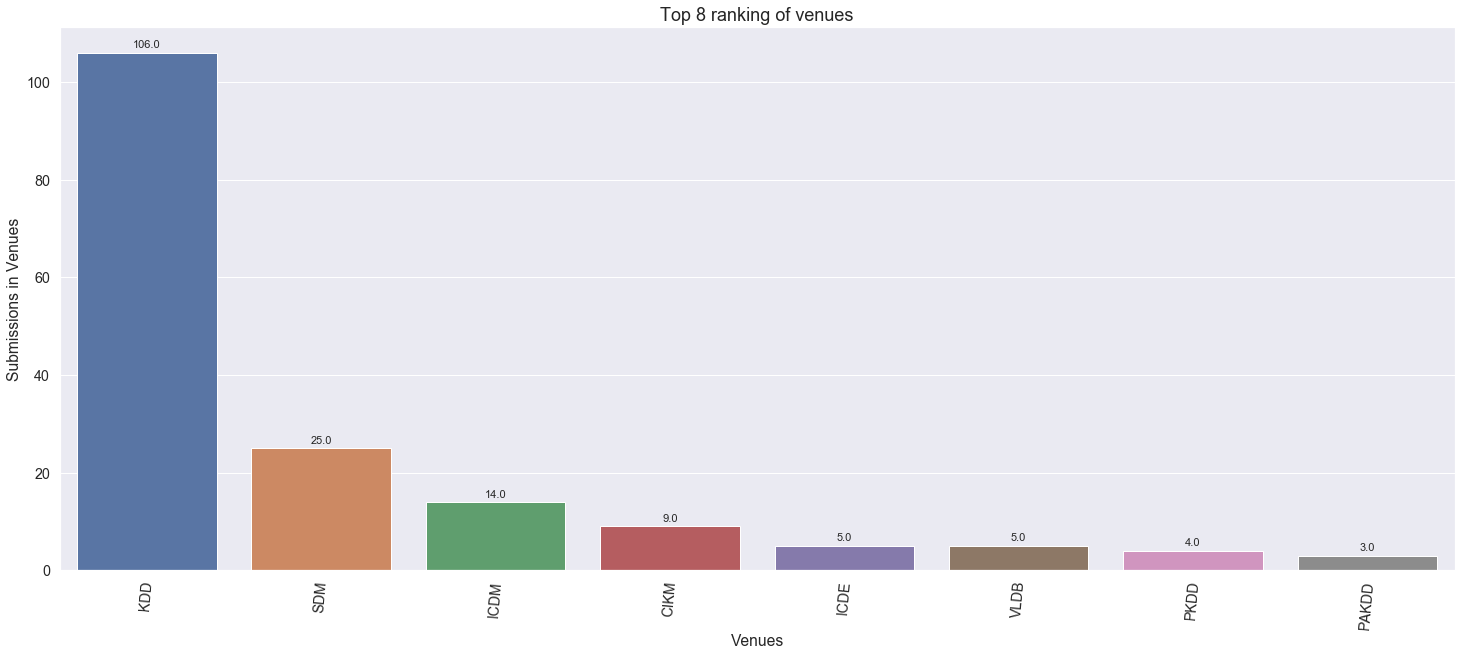

Total no. of venues : 8
Missing Data for venues : 0.00%
Top 8 :
 Venue
KDD        KDD
SDM        SDM
ICDM      ICDM
CIKM      CIKM
ICDE      ICDE
VLDB      VLDB
PKDD      PKDD
PAKDD    PAKDD
Name: venue, dtype: object


In [5]:
# Plotting top rank venues
venue_Grp = pd.DataFrame()
venue_Grp['venueCount'] = df.groupby(['Venue'])['Venue'].count()
venue_Grp['venue'] = venue_Grp.index

# Check if ranking is less than topmost
no_Filtered_Venues = Venue_Authors.shape[0]
if no_Filtered_Venues < topmost:
    topmost = no_Filtered_Venues

# There are too many authors, so we will subset the top authors
venue_Grp_top = venue_Grp.sort_values(by='venueCount',ascending=False).head(topmost)
order_venues = venue_Grp_top.sort_values(by='venueCount',ascending=False)['venue']

plt.figure(figsize=(25, 10))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x='venue', y='venueCount', data=venue_Grp_top, order=order_venues)
ax.set_title('Top ' + str(topmost) + ' ranking of venues', fontsize=18)
for rectBox in ax.patches:
    count = rectBox.get_height()
    #print("Counts :", count)    
    ax.text(rectBox.get_x() + rectBox.get_width()/2.,
            count + bar_text_filler,
            count, # '{:1.2f}%'.format(count/total_counts*100) to get %
            ha="center", fontsize=11)


xt = plt.xticks(rotation=85)
plt.xlabel('Venues')
plt.ylabel('Submissions in Venues')
plt.show()

print("Total no. of venues :", len(venue_Grp.index))
print("Missing Data for venues : " +
      '{:1.2f}%'.format(df['Venue'].isnull().sum() / total_counts * 100))
print("Top " + str(topmost) + " :\n", venue_Grp_top['venue'])

for ctr in range(len(venue_Grp_top)):
    if (venue_Grp_top.iloc[ctr]['venue'] == -999):
        print("Found in Index", str(ctr) + ":", venue_Grp_top.iloc[ctr]['venueCount'])
        print("Missing Data : " + '{:1.2f}%'.format(venue_Grp_top.iloc[ctr]['venueCount'] / total_counts * 100))


# (1) Attempt to observe what venues/conferences are submitted by authors and ranked the topmost

In [6]:
by_author = df.groupby('Author')

#for author, frame in by_author:
#    print(frame, end="\n\n") # frame.head(2)

In [7]:
# Sum all the submissions for all authors = No. of edges in venue categories (with duplicate edges) = same as df rows
print("Total no. of submissions for all authors :", sum(by_author.count().values)) # sum of venue counts for all authors

Total no. of submissions for all authors : [171]


In [8]:
print("The most popular author :", author_Grp_top.iloc[0]['author'])
print("The first author in the author's group :", by_author.first().index[0])
print("The second author in the order of original dataframe :", by_author.head(1)['Author'][1]) # based on original index order

The most popular author : Jure Leskovec
The first author in the author's group : Aditya Grover
The second author in the order of original dataframe : Fuzheng Zhang


In [9]:
# No. of submissions for author based on unique venues/conferences whereby the groups should be the same as the degree value
most_popular_author = author_Grp_top.iloc[0]['author'] 
first_author_inGroupby = by_author.first().index[0]
authors = [most_popular_author, first_author_inGroupby]
authors_rank_df = pd.DataFrame()
author_submissions_df = pd.DataFrame()

for author in authors:
    print("\n", author)
    print("-------------------")
    unique_venues, counts = np.unique(by_author.get_group(author)['Venue'], return_counts=True) # Adam Jatowt, Ba Quan Truong
    print("No. of each venue for " + author + " (descending order) :", (sorted(counts, reverse = True)))

    # Value of 248 instead of 251 is because the 4 proceedings" tag with no authors and also an author for "NoBt" which account for no booktitles
    print("Total No. of submission for all unique venues for " + author + " :\n", by_author.get_group(author).count())

    # Initialize all
    first_tuple = second_tuple = third_tuple = fourth_tuple = fifth_tuple = ['', '']
        
    # Attempt to compute "Top 5" positions if they exist
    author_venues_counts = list(zip(unique_venues, counts))

    # Modifies the original list with descending sorting order
    author_venues_counts.sort(key=lambda x: x[1],reverse = True)

    author_unique_venue_count = len(author_venues_counts)
    print("No. of unique submitted venues for " + author + " :", author_unique_venue_count)

    if author_venues_counts[0][0] != 'NoBt':
        if author_unique_venue_count >= 5:
            fifth_tuple = [author, author_venues_counts[4]]
            fourth_tuple = [author, author_venues_counts[3]]
            third_tuple = [author, author_venues_counts[2]]
            second_tuple = [author, author_venues_counts[1]]
            first_tuple = [author, author_venues_counts[0]]
        elif author_unique_venue_count >= 4:
            fourth_tuple = [author, author_venues_counts[3]]
            third_tuple = [author, author_venues_counts[2]]
            second_tuple = [author, author_venues_counts[1]]
            first_tuple = [author, author_venues_counts[0]]
        elif author_unique_venue_count >= 3:
            third_tuple = [author, author_venues_counts[2]]
            second_tuple = [author, author_venues_counts[1]]
            first_tuple = [author, author_venues_counts[0]]
        elif author_unique_venue_count >= 2:
            second_tuple = [author, author_venues_counts[1]]
            first_tuple = [author, author_venues_counts[0]]
        elif author_unique_venue_count >= 1:
            first_tuple = [author, author_venues_counts[0]]        
    else:                
        if author_unique_venue_count >= 5:
            fourth_tuple = [author, author_venues_counts[4]]
            third_tuple = [author, author_venues_counts[3]]
            second_tuple = [author, author_venues_counts[2]]
            first_tuple = [author, author_venues_counts[1]]
        elif author_unique_venue_count >= 4:
            third_tuple = [author, author_venues_counts[3]]
            second_tuple = [author, author_venues_counts[2]]
            first_tuple = [author, author_venues_counts[1]]
        elif author_unique_venue_count >= 3:
            second_tuple = [author, author_venues_counts[2]]
            first_tuple = [author, author_venues_counts[1]]
        elif author_unique_venue_count >= 2:
            first_tuple = [author, author_venues_counts[1]]

    print("The first position venue with total submission counts for " + author + " :", first_tuple)
    print("The second position venue with total submission counts for " + author + " :", second_tuple)
    print("The third position venue with total submission counts for " + author + " :", third_tuple)
    print("The fourth position venue with total submission counts for " + author + " :", fourth_tuple)
    print("The fifth position venue with total submission counts for " + author + " :", fifth_tuple)
    print("Venues and counts of " + author + " :\n", author_venues_counts)

    tmp_ranked_data = [first_tuple, second_tuple, third_tuple, fourth_tuple, fifth_tuple]
    ranked_data = [element for element in tmp_ranked_data if element != ['', '']]  # Strip empty ranking
    
    # Create the topmost ranking venues for each author that have venue grouped
    # ['Author', ('Venue', 'Count')] consider as 2 columns
    tmp_author_rank_df = pd.DataFrame.from_records(ranked_data, columns =['Author', 'Venues with counts'])
    authors_rank_df = authors_rank_df.append(tmp_author_rank_df, ignore_index=True) 
    
    print(authors_rank_df)
    print("--------------------" + author + "--------------------")

    # Create for authors having submissions for each venue respectively
    tmp_author_submissions_df = pd.DataFrame({'Author': author, 'Venue': unique_venues, 'Submissions': counts})
    author_submissions_df = author_submissions_df.append(tmp_author_submissions_df, ignore_index=True) 

print("-------------- Get info from index 4 --------------")
print("Author :", authors_rank_df.iloc[0])
print("at Venue :", authors_rank_df.iloc[0][1])
print("with Count:", authors_rank_df.iloc[0][1][1])
print("---------------------------------------------------")
print("List of authors having submissions for each unique venue respectively (from bottom) :")
author_submissions_df.tail(10)


 Jure Leskovec
-------------------
No. of each venue for Jure Leskovec (descending order) : [26, 6, 6, 2, 1, 1, 1, 1]
Total No. of submission for all unique venues for Jure Leskovec :
 Venue    44
dtype: int64
No. of unique submitted venues for Jure Leskovec : 8
The first position venue with total submission counts for Jure Leskovec : ['Jure Leskovec', ('KDD', 26)]
The second position venue with total submission counts for Jure Leskovec : ['Jure Leskovec', ('ICDM', 6)]
The third position venue with total submission counts for Jure Leskovec : ['Jure Leskovec', ('SDM', 6)]
The fourth position venue with total submission counts for Jure Leskovec : ['Jure Leskovec', ('CIKM', 2)]
The fifth position venue with total submission counts for Jure Leskovec : ['Jure Leskovec', ('ICDE', 1)]
Venues and counts of Jure Leskovec :
 [('KDD', 26), ('ICDM', 6), ('SDM', 6), ('CIKM', 2), ('ICDE', 1), ('PAKDD', 1), ('PKDD', 1), ('VLDB', 1)]
          Author Venues with counts
0  Jure Leskovec          (KDD,

,Author,Venue,Submissions
0,Jure Leskovec,CIKM,2
1,Jure Leskovec,ICDE,1
2,Jure Leskovec,ICDM,6
3,Jure Leskovec,KDD,26
4,Jure Leskovec,PAKDD,1
5,Jure Leskovec,PKDD,1
6,Jure Leskovec,SDM,6
7,Jure Leskovec,VLDB,1
8,Aditya Grover,KDD,1


In [10]:
authors = sorted(list(df.Author.unique()))
print("Total no. of unique authors :", len(authors))

authors[:5] # Top 5 in the list

Total no. of unique authors : 85


['Aditya Grover',
 'Agma J. M. Traina',
 'Ajit Singh',
 'Alexander Tuzhilin',
 'Alon Y. Halevy']

In [11]:
authors_rank_df = pd.DataFrame()
author_submissions_df = pd.DataFrame()
topmost = 5
ranked_data = []
author_ranked_data = []

# for author, frame in by_author (alternative method)
for author in authors:
    unique_venues, counts = np.unique(by_author.get_group(author)['Venue'], return_counts=True) # Adam Jatowt, Ba Quan Truong
    
    num_unique_venues = len(unique_venues)
    #print("No. of unique venues for " + author + " : ", num_unique_venues)
    
    # Re-initialize ranked data list; clear causes complications in retaining the values
    # Caution : Maybe bugs in list clear; take a day to debug
    ranked_data = []

    # Attempt to compute "Top 5" positions
    author_venues_counts = list(zip(unique_venues, counts))

    # Modifies the original list with descending sorting order
    author_venues_counts.sort(key=lambda x: x[1],reverse = True)
    #print("Venues and counts of " + author + " :\n", author_venues_counts)

    # First venue is not 'NoBt'
    if author_venues_counts[0][0] != 'NoBt':
        # Not one less in case the 'NoBt'is in the middle of topmost venues and we can still pick topmost venues 
        if num_unique_venues > topmost:
            # Range runs from 0 to topmost-1 value inclusively; get only the values that is not "NoBt"
            for count in range(topmost):
                #rank_tuple = [author, author_venues_counts[count]]
                rank_tuple = author_venues_counts[count]
                
                if author_venues_counts[count][0] != 'NoBt':
                    ranked_data.append(rank_tuple)
                #else:
                    #print(str(num_unique_venues) + " Venues and counts of " + author + " :\n", author_venues_counts)
                    #print("Venue no. " + str(count + 1) + " in the middle is \"NoBt\"!")

            #print("Top " + str(topmost) + " ranked data without \"NoBt\" for " + author + " :\n", ranked_data)
            #print("--------------------------------------------")

        elif num_unique_venues > 0:
            # Range from 0 to num_unique_venues - 1 for correct indexing; get only the values that is not "NoBt"
            for count in range(num_unique_venues):
                #rank_tuple = [author, author_venues_counts[count]]
                rank_tuple = author_venues_counts[count]

                if author_venues_counts[count][0] != 'NoBt':
                    ranked_data.append(rank_tuple)
                #else:
                    #print(str(num_unique_venues) + " Venues and counts of " + author + " :\n", author_venues_counts)
                    #print("Venue no. " + str(count + 1) + " in the middle is \"NoBt\"!")
                
            #print("Only top " + str(num_unique_venues-1) + " ranked data without \"NoBt\" for " + author + " :\n", ranked_data)
            #print("--------------------------------------------")
        
        # Venues and counts of any author must be at least 1 venue without "NoBt"
        # Thus, do not need to check num_unique_venues <= 0
    else:
        # First venue is 'NoBt'
        if num_unique_venues > topmost:
            # Range runs from 1 to topmost value inclusively; get the next value that is not "NoBt"
            for count in range(1, topmost + 1):
                #rank_tuple = [author, author_venues_counts[count]]
                rank_tuple = author_venues_counts[count]
                ranked_data.append(rank_tuple)
            
            #print(str(num_unique_venues) + " Venues and counts of " + author + " :\n", author_venues_counts)
            #print("Top " + str(topmost) + " ranked data without \"NoBt\" for " + author + " :\n", ranked_data)
        elif num_unique_venues > 1:
            # Range from 1 to num_unique_venues - 1 for correct indexing; get the next value that is not "NoBt"
            for count in range(1, num_unique_venues):
                #rank_tuple = [author, author_venues_counts[count]]
                rank_tuple = author_venues_counts[count]
                ranked_data.append(rank_tuple)
            
            #print(str(num_unique_venues) + " Venues and counts of " + author + " :\n", author_venues_counts)
            #print("Only top " + str(num_unique_venues - 1) + " ranked data without \"NoBt\" for " + author + " :\n", ranked_data)
        #else:
            #print("Venues and counts of " + author + " :\n", author_venues_counts)
            #print("No. of unique venues for " + author + " (must be at least 2 venues including \"NoBt\") : ", num_unique_venues)
            #print("----------------------No ranked data----------------------")

    # Create the topmost ranking venues for each author that have venue grouped
    author_ranked_data.append(ranked_data)
    #print("Author ranked data for " + author + " :\n", author_ranked_data)
    #print("====================================================================================")

    #tmp_author_rank_df = pd.DataFrame.from_records(ranked_data, columns =['Author', 'Venues with counts'])
    #tmp_author_rank_df = pd.DataFrame(data=ranked_data)
    #authors_rank_df = authors_rank_df.append(tmp_author_rank_df, ignore_index=True) 
    
    # Create for authors having submissions for each venue respectively
    tmp_author_submissions_df = pd.DataFrame({'Author': author, 'Venue': unique_venues, 'Submissions': counts})
    
    # Continuous index and need to equate to the original dataframe
    author_submissions_df = author_submissions_df.append(tmp_author_submissions_df, ignore_index=True)

authors_rank_df = pd.DataFrame(author_ranked_data, columns=['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5'], index=authors)
authors_rank_df.head(10)

,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5
Aditya Grover,"(KDD, 1)",None,None,None,None
Agma J. M. Traina,"(VLDB, 1)",None,None,None,None
Ajit Singh,"(PAKDD, 1)",None,None,None,None
Alexander Tuzhilin,"(KDD, 1)",None,None,None,None
Alon Y. Halevy,"(CIKM, 1)",None,None,None,None
Ana Paula Appel,"(SDM, 2)",None,None,None,None
Anand Rajaraman,"(KDD, 1)",None,None,None,None
Andreas Krause 0001,"(KDD, 2)",None,None,None,None
Andrew Tomkins,"(KDD, 2)","(SDM, 1)",None,None,None
Ashton Anderson,"(KDD, 1)",None,None,None,None


In [12]:
# Display ranked data with author name
authors_rank_df.loc[most_popular_author, :] # ['Sourav S. Bhowmick']

Rank 1    (KDD, 26)
Rank 2    (ICDM, 6)
Rank 3     (SDM, 6)
Rank 4    (CIKM, 2)
Rank 5    (ICDE, 1)
Name: Jure Leskovec, dtype: object

In [13]:
unique_index = pd.Index(list(authors_rank_df.index))
author_index = unique_index.get_loc(most_popular_author)
print("Most popular author's Index :", author_index)

Most popular author's Index : 49


In [14]:
# Accessing the individual elements
print("Check for None : ", authors_rank_df.iloc[author_index][3] == None)
print("Row 81 :\n", authors_rank_df.iloc[author_index])
print("\nRow 81, column 2 :", authors_rank_df.iloc[author_index][1])
print("Row 81, column 2, item 2 :", authors_rank_df.iloc[author_index][1][1])

Check for None :  False
Row 81 :
 Rank 1    (KDD, 26)
Rank 2    (ICDM, 6)
Rank 3     (SDM, 6)
Rank 4    (CIKM, 2)
Rank 5    (ICDE, 1)
Name: Jure Leskovec, dtype: object

Row 81, column 2 : ('ICDM', 6)
Row 81, column 2, item 2 : 6


In [15]:
venues = sorted(list(df.Venue.unique()))
print("Total no. of unique venues (incl. NoBt) :", len(venues))

venues[:20] # Top 20 in the list 

Total no. of unique venues (incl. NoBt) : 8


['CIKM', 'ICDE', 'ICDM', 'KDD', 'PAKDD', 'PKDD', 'SDM', 'VLDB']

In [16]:
# Categorise submissions by venue per author same value as the number of edges in graph (ie. 472)
print("Shape of data frame :", author_submissions_df.shape)
author_submissions_df[251:304]

Shape of data frame : (110, 3)


,Author,Venue,Submissions


In [17]:
# Locating author's index
Author_Venues = pd.DataFrame()

# Non-unique Conferences/Venues
Author_Venues['venue_list'] = df.groupby('Author')['Venue']
print("No. of authors : ", Author_Venues.shape[0])

# Author_Venues['venue_list'][0] gives the first author
author_Venue_List = Author_Venues['venue_list'][author_index] # 'Sourav S. Bhowmick'
authors_Venue_List = Author_Venues['venue_list']

# Gives the list of venues for first author, index 0 is the name of the author
print("List of venues for " + author_Venue_List[0] + " : \n", author_Venue_List[1])

# Participated Conferences/Venues for each author 
unique_values, counts = np.unique(author_Venue_List[1], return_counts=True)
conference_dict = dict(zip(unique_values, counts))

conference_dict

# Print unique venues with total counts
# for idx in range(len(unique_values)):
#     print(str(unique_values[idx]) + " : (" + str(counts[idx]) + ")")
    
print("\nSum of participated conferences :", sum(counts))

# print("\nList of venues for all authors :")
indx = 0
for author in authors_Venue_List:
    author_conference_dict = dict({author[0]: author[1]})
    # Show details for each author with the corresponding venues
    # print(author_conference_dict)
    if author[0] == 'Sourav S. Bhowmick':
        print("********************************")
        print("Found author at location : ", indx)
        print("********************************")

    #print("==========")
    indx += 1

print("Final Index for author :", indx)

No. of authors :  85
List of venues for Jure Leskovec : 
 3        KDD
9        KDD
15       KDD
19       KDD
22      CIKM
26       KDD
30       KDD
33       KDD
38       KDD
42       KDD
44       KDD
47       KDD
49       KDD
53       KDD
58       KDD
61       SDM
63       SDM
71      CIKM
74      ICDM
80       KDD
82      ICDM
84      ICDM
86      ICDM
89      ICDM
92       KDD
96       KDD
99       KDD
101      SDM
103     ICDM
105      KDD
111      SDM
112      KDD
119      SDM
123     ICDE
126      KDD
135      KDD
141      KDD
143      KDD
149      SDM
154      KDD
156    PAKDD
163     VLDB
164      KDD
167     PKDD
Name: Venue, dtype: object

Sum of participated conferences : 44
Final Index for author : 85


## Setup filters only interested venues for plotting "author-venue" graph

In [18]:
# Tier 1 : VLDB, KDD
# Tier 2 : EDBT, ICDE, ICDM, SDM, CIKM
# Tier 3 : DASFAA, PAKDD, PKDD, DEXA
def intersection(list1, list2): 
    return list(set(list1) & set(list2))

# Read desired venues from configuration file (CSV formatted)
tier_venues_df = pd.read_csv('./interested_venues.csv')

tier_venues = tier_venues_df.values.flatten() # ndarray format
list(tier_venues)

['VLDB',
 'KDD',
 'EDBT',
 'ICDE',
 'ICDM',
 'SDM',
 'CIKM',
 'DASFAA',
 'PAKDD',
 'PKDD',
 'DEXA']

Popular venues : ['CIKM', 'ICDE', 'ICDM', 'KDD', 'PAKDD', 'PKDD', 'SDM', 'VLDB']
Sorted Tier venues : ['CIKM', 'DASFAA', 'DEXA', 'EDBT', 'ICDE', 'ICDM', 'KDD', 'PAKDD', 'PKDD', 'SDM', 'VLDB']
Intersected venues : ['CIKM', 'ICDE', 'ICDM', 'KDD', 'PAKDD', 'PKDD', 'SDM', 'VLDB']
Interested venues not present : {'DASFAA', 'DEXA', 'EDBT'}


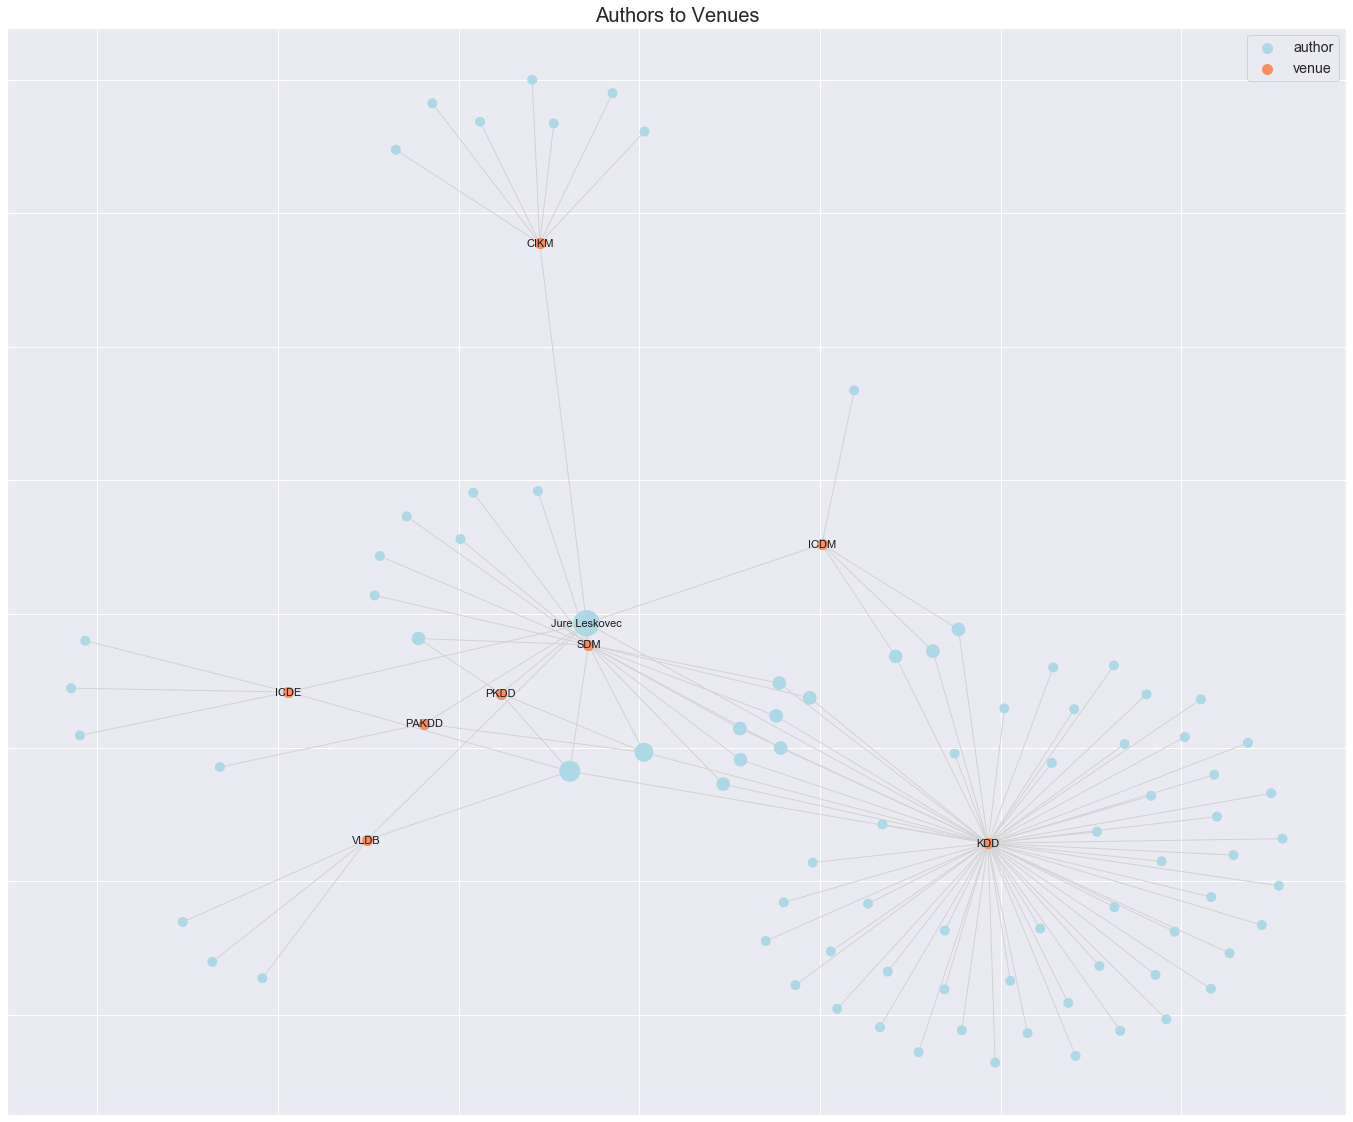

In [19]:
Graphtype = nx.Graph()

# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='Author', target='Venue', create_using=Graphtype)

#layout = nx.spring_layout(g)

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

plt.figure(figsize=(24, 20))

# 3. Draw the relevant graph with nodes and links
# People small and grey

# Labels for authors ONLY
# People who are highly connected are a highlighted color

# Obtain degree of authors and multiply by 80 to get the circle size
# The respective size is proportional to the number of connections, degree
author_size = [g.degree(author) * 80 for author in authors]

# List of Author nodes are determined from the authors list and displayed nodes in lightblue
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=authors, 
                       node_size=author_size, # a list of sizes, based on degree centrality
                       node_color='lightblue')

# List of Venue nodes are determined from the venues list and displayed nodes in grey
nx.draw_networkx_nodes(g, layout, nodelist=venues, node_color='#AAAAAA', node_size=100) #cccccc

# Create a list of popular venues
popular_venues = [venue for venue in venues if g.degree(venue) > 0]
print("Popular venues :", popular_venues)
sorted_tier_venues = sorted(tier_venues)
print("Sorted Tier venues :", sorted_tier_venues)

displayed_venues = sorted(intersection(tier_venues, popular_venues))
print("Intersected venues :", displayed_venues)
venues_difference = set(tier_venues).symmetric_difference(displayed_venues)
print("Interested venues not present :", venues_difference)

# Create a list of popular authors
popular_authors = [author for author in authors if g.degree(author) > 7] # For filtered venues, use 2
# Create nodes for popular authors mainly for legend labelling
nx.draw_networkx_nodes(g, layout, nodelist=popular_authors, node_color='lightblue', node_size=100, label='author') # lightblue

# List of popular venue nodes are determined from the popular_venues list and displayed nodes in orange
nx.draw_networkx_nodes(g, layout, nodelist=popular_venues, node_color='#fc8d62', node_size=100, label='venue') # orange

# Links/Edges are thin and displayed in lightgrey
nx.draw_networkx_edges(g, layout, width=1, edge_color="lightgrey") #cccccc

# Label the Venues
venue_labels = dict(zip(venues, venues))
displayed_venues_labels = dict(zip(displayed_venues, displayed_venues))

# Label the authors
authors_labels = dict(zip(authors, authors))
popular_authors_labels = dict(zip(popular_authors, popular_authors))

nx.draw_networkx_labels(g, layout, labels=popular_authors_labels, font_size=11) # author_labels
nx.draw_networkx_labels(g, layout, labels=displayed_venues_labels, font_size=11) # venue_labels
# font_family="sans-serif"

# 4. Turn off the axis
#plt.axis('off')
#nx.draw_networkx(g, layout)

plt.legend(loc='best')

plt.title("Authors to Venues", fontsize=20)
#save_fig("BhowmickSouravS_conf_graph")

# To remove node label coordinates and have matplotlib to show display
plt.show()

In [20]:
len(g.nodes) # Total no. of authors (175) and conferences (56)

93

In [21]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 93
Number of edges: 110
Average degree:   2.3656


## Property 1 : Small-world phenomenon

In [22]:
N = nx.number_of_nodes(g)
L = nx.number_of_edges(g)
dMax = nx.distance_measures.diameter(g)
k = (2 * L) / N

# work automatically for directed/undirected graph, should have to multiply by 2 for undirected graph
d = nx.average_shortest_path_length(g)

print("Diameter of graph : ", dMax)
print("Average degree of graph, <k> : ", float("{0:.4f}".format(k)))

print("Is this a directed graph : ", g.is_directed())
print("Average distance of graph : ", float("{0:.4f}".format(d)))

d_rand = np.log(N) / np.log(k)
print("Random network distance estimate, ln N/ln <k> : ", float("{0:.4f}".format(d_rand)))

Diameter of graph :  4
Average degree of graph, <k> :  2.3656
Is this a directed graph :  False
Average distance of graph :  2.7966
Random network distance estimate, ln N/ln <k> :  5.2642


In [23]:
degree_dict = (dict(g.degree))
degree_dict_values = degree_dict.values()
degree_dict_keys = degree_dict.keys()

max_dict_value = max(degree_dict_values)
max_dict_key = max(degree_dict, key=lambda k: degree_dict[k])

print("Degree Dictionary : ", degree_dict)
print("Max. degree : ", max_dict_value)
print("Max. degree key : ", max_dict_key)
print("Degree for venue, 'ICDE' :", degree_dict['ICDE'])

# Values for degrees are categories for unique conferences or authors; there might be multiple duplicates links/edges
# They are different from the unique values for book titles and respective counts in the total submissions/participations

Degree Dictionary :  {'Hongwei Wang': 1, 'KDD': 63, 'Fuzheng Zhang': 1, 'Mengdi Zhang': 1, 'Jure Leskovec': 8, 'Miao Zhao': 1, 'Wenjie Li': 1, 'Zhongyuan Wang': 1, 'Srijan Kumar': 1, 'Xikun Zhang': 1, 'Rex Ying': 1, 'Ruining He': 1, 'Kaifeng Chen': 1, 'Pong Eksombatchai': 1, 'William L. Hamilton': 1, 'Claire Donnat': 1, 'Marinka Zitnik': 1, 'David Hallac': 1, 'Minkyoung Kim': 1, 'CIKM': 8, 'Daniel A. McFarland': 1, 'Youngsuk Park': 1, 'Stephen P. Boyd': 1, 'Sagar Vare': 1, 'Himabindu Lakkaraju': 2, 'Jon M. Kleinberg': 4, 'Jens Ludwig': 1, 'Sendhil Mullainathan': 2, 'Hao Yin': 1, 'Austin R. Benson': 2, 'David F. Gleich': 2, 'Caroline Lo': 1, 'Dan Frankowski': 1, 'Aditya Grover': 1, 'Stephen H. Bach': 1, 'Julian J. McAuley': 2, 'Rahul Pandey': 1, 'Qingyuan Zhao': 1, 'Murat A. Erdogdu': 1, 'Hera Y. He': 1, 'Anand Rajaraman': 1, 'SDM': 17, 'Paul Bennett': 1, 'C. Lee Giles': 1, 'Alon Y. Halevy': 1, 'Jiawei Han 0001': 1, 'Marti A. Hearst': 1, 'Jaewon Yang': 2, 'ICDM': 5, 'Dafna Shahaf': 1, '

In [24]:
degree_list = list((g.degree))
sorted(degree_list, reverse=True)[:50] # Descending according to index and display 50

[('Zhongyuan Wang', 1),
 ('Youngsuk Park', 1),
 ('Xikun Zhang', 1),
 ('William L. Hamilton', 1),
 ('Wenjie Li', 1),
 ('VLDB', 5),
 ('U Kang', 1),
 ('Stephen P. Boyd', 1),
 ('Stephen H. Bach', 1),
 ('Srijan Kumar', 1),
 ('Sridhar Machiraju', 1),
 ('Seth A. Myers', 2),
 ('Sendhil Mullainathan', 2),
 ('Sagar Vare', 1),
 ('SDM', 17),
 ('Ruining He', 1),
 ('Rex Ying', 1),
 ('Ravi Kumar 0001', 2),
 ('Rahul Pandey', 1),
 ('Qingyuan Zhao', 1),
 ('Pong Eksombatchai', 1),
 ('Paul Bennett', 1),
 ('PKDD', 4),
 ('PAKDD', 3),
 ('Natalie S. Glance', 2),
 ('Myunghwan Kim 0002', 1),
 ('Murat A. Erdogdu', 1),
 ('Mukund Seshadri', 1),
 ('Minkyoung Kim', 1),
 ('Miao Zhao', 1),
 ('Mengdi Zhang', 1),
 ('Matthew Hurst', 1),
 ('Mary McGlohon', 1),
 ('Marti A. Hearst', 1),
 ('Marko Grobelnik', 1),
 ('Marinka Zitnik', 1),
 ('Manuel Gomez Rodriguez', 1),
 ('Lars Backstrom', 1),
 ('Kaifeng Chen', 1),
 ('KDD', 63),
 ('Jure Leskovec', 8),
 ('Jure Ferlez', 1),
 ('Julian J. McAuley', 2),
 ('José Fernando Rodrigues Jr

In [25]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
dmax = max(degree_sequence)

print("Sorted degree sequence :", degree_sequence)
print("Max. degree :", dmax)

Sorted degree sequence : [63, 17, 8, 8, 5, 5, 5, 5, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Max. degree : 63


In [26]:
degree_histogram = nx.degree_histogram(g)
print("Degree of the most popular author :", g.degree(most_popular_author)) # 'Sourav S. Bhowmick'
print("No. of degree components (from 0 which is unconnected) :", len(degree_histogram))
print("Total no. of unique authors and conferences :", sum(degree_histogram))

Degree of the most popular author : 8
No. of degree components (from 0 which is unconnected) : 64
Total no. of unique authors and conferences : 93


In [27]:
print("List of index and values :")

for index, value in zip(range(len(degree_histogram)), degree_histogram):
    print(index, value, end='; ')

List of index and values :
0 0; 1 71; 2 11; 3 1; 4 2; 5 4; 6 0; 7 0; 8 2; 9 0; 10 0; 11 0; 12 0; 13 0; 14 0; 15 0; 16 0; 17 1; 18 0; 19 0; 20 0; 21 0; 22 0; 23 0; 24 0; 25 0; 26 0; 27 0; 28 0; 29 0; 30 0; 31 0; 32 0; 33 0; 34 0; 35 0; 36 0; 37 0; 38 0; 39 0; 40 0; 41 0; 42 0; 43 0; 44 0; 45 0; 46 0; 47 0; 48 0; 49 0; 50 0; 51 0; 52 0; 53 0; 54 0; 55 0; 56 0; 57 0; 58 0; 59 0; 60 0; 61 0; 62 0; 63 1; 

## Property 2 : Scale-free

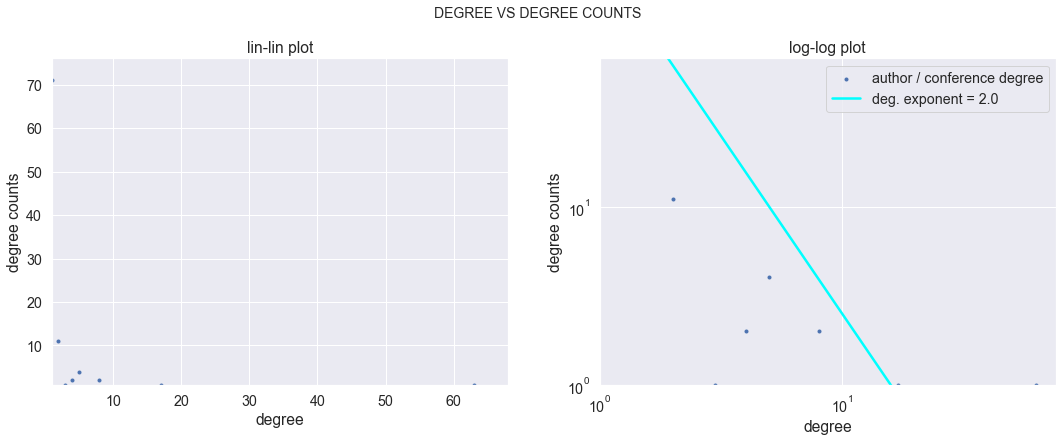

In [28]:
# The degrees here are for both the author (175) and conferences (56) 
degree_counts = degree_histogram
degree = list(range(len(degree_histogram)))

coeff = 250
power = -2.0
x = np.linspace(1, 100, num=10)
y = coeff * x**power
legend_labels = ['author / conference degree', 'deg. exponent = ' + str(-1*power)]
filler_space = 5

# Plotting graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle('Degree vs Degree Counts'.upper(), y=1.0, fontsize=14)

# Plot lin-lin graph on the left column
plt.subplot(1, 2, 1)

plt.xlabel(r'degree')
plt.xlim(1, max(degree) + filler_space)
plt.ylabel(r'degree counts')
plt.ylim(1, max(degree_counts) + filler_space)

#plt.legend(loc='best') # 'upper left'
plt.scatter(degree, degree_counts, marker='.')
plt.title(r'lin-lin plot')
plt.grid(True)

# Plot log-log graph on the right column
plt.subplot(1, 2, 2)
plt.xlabel('degree')
plt.xscale('log')
plt.xlim(1, max(degree_counts) + filler_space)
plt.ylabel('degree counts')
plt.yscale('log')
plt.ylim(1, max(degree) + filler_space)

plt.scatter(degree, degree_counts, marker='.', label=legend_labels[0])
plt.title('log-log plot')

# '$f(x) = '+str(power)+'\cdot x + \log('+ str(coeff) + ')$'
plt.plot(x, y, linewidth=2.5, color='cyan', label=legend_labels[1])
plt.legend(loc='best')

# Change the order displayed in the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.show()

## The plot above show that degree counts for authors tend to follow power-law

In [29]:
N = len(g.nodes)
prob_k = []
for k in degree_histogram:
    prob_k.append(k/N)
    
print(prob_k)

max(prob_k)

[0.0, 0.7634408602150538, 0.11827956989247312, 0.010752688172043012, 0.021505376344086023, 0.043010752688172046, 0.0, 0.0, 0.021505376344086023, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010752688172043012, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010752688172043012]


0.7634408602150538

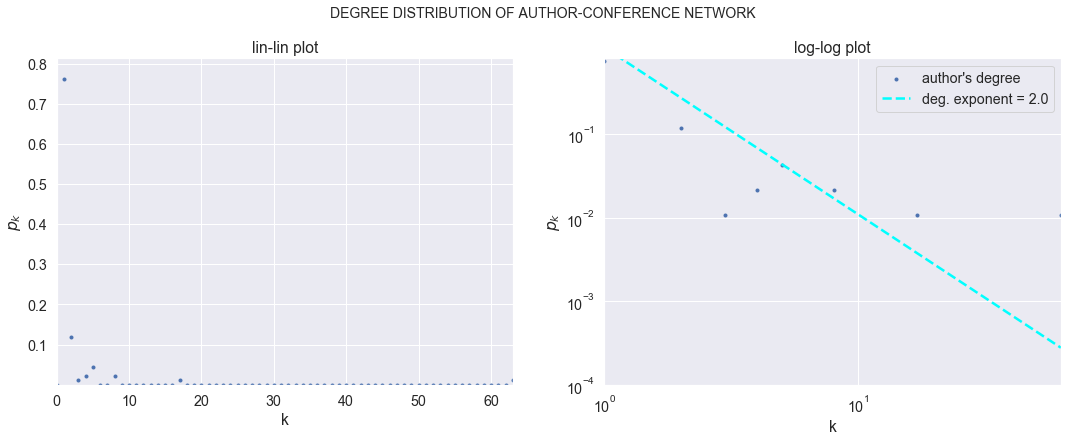

In [30]:
degree_counts = degree_histogram
degree = list(range(len(degree_histogram)))

coeff = 1.1
power = -2.0
x = np.linspace(1, max(degree), num=10)
y = coeff * x**power
legend_labels = ['author\'s degree', 'deg. exponent = ' + str(-1*power)]
filler_space = 0.05

# Plotting graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle('Degree Distribution of author-conference network'.upper(), y=1.0, fontsize=14)

# Plot lin-lin graph on the left column
plt.subplot(1, 2, 1)

plt.xlabel(r'k')
plt.xlim(0, max(degree) + filler_space)
plt.ylabel(r'$p_k$')
plt.ylim(0.0001, max(prob_k) + filler_space)

#plt.legend(loc='best') # 'upper left'
plt.scatter(degree, prob_k, marker='.')
plt.title(r'lin-lin plot')
plt.grid(True)

# Plot log-log graph on the right column
plt.subplot(1, 2, 2)
plt.xlabel('k')
plt.xscale('log')
plt.xlim(1, max(degree) + filler_space)
plt.ylabel(r'$p_k$')
plt.yscale('log')
plt.ylim(0.0001, max(prob_k) + filler_space)

plt.scatter(degree, prob_k, marker='.', label=legend_labels[0])
plt.title('log-log plot')

# '$f(x) = '+str(power)+'\cdot x + \log('+ str(coeff) + ')$'
plt.plot(x, y, '--', linewidth=2.5, color='cyan', label=legend_labels[1])
plt.legend(loc='best')

# Change the order displayed in the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.show()

## The plot above show that probability distributions for "author-conference" network tend to follow power-law as well

# Miscellaneous testings

In [31]:
find_Venue = 'VLDB'
title = 'A'
year = 2020

if title and year and (find_Venue in tier_venues):
    print("Found : " + title + " in " + str(year) +  " at " + find_Venue)
else:
    print("Not found :", find_Venue)

Found : A in 2020 at VLDB


In [32]:
from collections import Counter
degree_dict = Counter(degree_dict)

degree_dict.most_common()

[('KDD', 63),
 ('SDM', 17),
 ('Jure Leskovec', 8),
 ('CIKM', 8),
 ('ICDM', 5),
 ('Christos Faloutsos', 5),
 ('ICDE', 5),
 ('VLDB', 5),
 ('Jon M. Kleinberg', 4),
 ('PKDD', 4),
 ('PAKDD', 3),
 ('Himabindu Lakkaraju', 2),
 ('Sendhil Mullainathan', 2),
 ('Austin R. Benson', 2),
 ('David F. Gleich', 2),
 ('Julian J. McAuley', 2),
 ('Jaewon Yang', 2),
 ('Seth A. Myers', 2),
 ('Deepayan Chakrabarti', 2),
 ('Ravi Kumar 0001', 2),
 ('Andrew Tomkins', 2),
 ('Natalie S. Glance', 2),
 ('Hongwei Wang', 1),
 ('Fuzheng Zhang', 1),
 ('Mengdi Zhang', 1),
 ('Miao Zhao', 1),
 ('Wenjie Li', 1),
 ('Zhongyuan Wang', 1),
 ('Srijan Kumar', 1),
 ('Xikun Zhang', 1),
 ('Rex Ying', 1),
 ('Ruining He', 1),
 ('Kaifeng Chen', 1),
 ('Pong Eksombatchai', 1),
 ('William L. Hamilton', 1),
 ('Claire Donnat', 1),
 ('Marinka Zitnik', 1),
 ('David Hallac', 1),
 ('Minkyoung Kim', 1),
 ('Daniel A. McFarland', 1),
 ('Youngsuk Park', 1),
 ('Stephen P. Boyd', 1),
 ('Sagar Vare', 1),
 ('Jens Ludwig', 1),
 ('Hao Yin', 1),
 ('Carol

In [33]:
# Verify total number of publications for author from python script
#publications_list = [1, 3, 1, 1, 7, 1, 1, 18, 1, 1, 12, 7, 5, 18, 1, 3, 1, 4, 3, 2,
#                     4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 16, 1, 2, 1, 1, 1, 1, 3, 1, 2,
#                     2, 1, 1, 4, 1, 1, 6, 16, 1, 1, 1, 1, 1, 2, 3]

publications_list = [1, 3, 1, 1, 7, 1, 1, 18, 1, 1, 12, 7, 5, 18, 1, 3, 1, 4, 3, 2, 4, 1, 2, 1, 1, 1, 1, 1, 1,
                     1, 16, 1, 2, 1, 1, 1, 1, 3, 1, 2, 2, 1, 75, 1, 4, 1, 1, 6, 16, 1, 1, 1, 1, 1, 2, 3]
sum(publications_list), len(publications_list)

(251, 56)

In [34]:
py_etree = ['CIKM', 'CIKM', 'DASFAA (1)', 'GRADES/NDA@SIGMOD/PODS', 'ICDE', 'ICDE', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'SIGMOD Conference',
            'WSDM', 'Encyclopedia of Big Data Technologies', 'Human Interaction with Graphs', 'CIKM', 'ICDE', 'SIGIR', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'BCB',
            'CIKM', 'FQAS', 'ICDE', 'SIGIR', 'SIGIR', 'SIGMOD Conference', 'BCB', 'BCB', 'ICDE', 'ICDM Workshops',
            'ICDM Workshops', 'SIGMOD Conference', 'SIGMOD Conference', 'ACL (1)', 'CIKM', 'ICDE', 'ICDE', 'ICDE', 'ICDE', 'SIGMOD Conference',
            'BCB', 'BigComp', 'DEXA (1)', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'WWW (Companion Volume)', 'WWW (Companion Volume)', 'DASFAA (1)', 'DASFAA (2)',
            'CIDR', 'DASFAA (2)', 'EDBT', 'ACM Multimedia', 'SIGMOD Conference', 'SIGMOD Conference', 'BCB', 'CIKM', 'DASFAA (1)', 'DASFAA (1)',
            'DASFAA (2)', 'EDBT', 'ICDE', 'ICDE', 'IHI', 'IHI', 'IHI', 'ICMR', 'WWW (Companion Volume)', 'BCB',
            'BCB', 'CIKM', 'DASFAA (2)', 'DASFAA (1)', 'DASFAA (1)', 'ICDE', 'ACM Multimedia', 'SIGMOD Conference', 'Social Media Modeling and Computing', 'CIKM',
            'DASFAA (1)', 'DASFAA (2)', 'ICDE', 'ACM Multimedia', 'Pacific Symposium on Biocomputing', 'SIGMOD Conference', 'CIKM', 'CIKM', 'DASFAA', 'DASFAA',
            'ICDE', 'WSM@MM', 'DEXA', 'APWeb', 'CIKM', 'OTM Conferences (1)', 'DEXA', 'CIKM', 'DASFAA', 'DASFAA',
            'DASFAA', 'DEXA', 'SIGMOD Conference', 'WWW', 'DASFAA', 'DASFAA', 'DEXA', 'ER', 'ICDE Workshops', 'ICDE',
            'KDD', 'PAKDD', 'PAKDD', 'PAKDD', 'WWW', 'Foundations and Novel Approaches in Data Mining', 'CIKM', 'CIKM', 'CIKM', 'DASFAA',
            'DASFAA', 'DASFAA', 'DEXA', 'DEXA', 'DEXA', 'DEXA', 'CIKM', 'CIKM', 'CoopIS/DOA/ODBASE (2)', 'DASFAA',
            'DaWaK', 'DaWaK', 'DEXA', 'DEXA', 'DEXA', 'ER', 'MMDB', 'MMDB', 'PAKDD', 'PKDD',
            'CIKM', 'DEXA', 'DEXA', 'DEXA Workshops', 'EC-Web', 'ER (Workshops)', 'ER', 'ICDE', 'Mobile Data Management', 'CoopIS/DOA/ODBASE',
            'DaWaK', 'DEXA', 'DEXA', 'DEXA Workshops', 'DEXA Workshops', 'EC-Web', 'EC-Web', 'VLDB', 'WISE Workshops', 'DEXA',
            'DEXA', 'DOLAP', 'ICDCS', 'ICPADS', 'Kyoto International Conference on Digital Libraries', 'Kyoto International Conference on Digital Libraries', 'DASFAA', 'DaWaK', 'ICSC', 'IDEAS',
            'ADL', 'DEXA', 'ER Workshops', 'ER', 'ER Workshops', 'FODO']

py_sax = ['CIKM', 'CIKM', 'DASFAA (1)', 'GRADES/NDA@SIGMOD/PODS', 'ICDE', 'ICDE', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'SIGMOD Conference',
          'WSDM', 'CIKM', 'ICDE', 'SIGIR', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'BCB', 'CIKM', 'FQAS',
          'ICDE', 'SIGIR', 'SIGIR', 'SIGMOD Conference', 'BCB', 'BCB', 'ICDE', 'ICDM Workshops', 'ICDM Workshops', 'SIGMOD Conference',
          'SIGMOD Conference', 'ACL (1)', 'CIKM', 'ICDE', 'ICDE', 'ICDE', 'ICDE', 'SIGMOD Conference', 'BCB', 'BigComp',
          'DEXA (1)', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'WWW (Companion Volume)', 'WWW (Companion Volume)', 'DASFAA (1)', 'DASFAA (2)', 'CIDR', 'DASFAA (2)',
          'EDBT', 'ACM Multimedia', 'SIGMOD Conference', 'SIGMOD Conference', 'BCB', 'CIKM', 'DASFAA (1)', 'DASFAA (1)', 'DASFAA (2)', 'EDBT',
          'ICDE', 'ICDE', 'IHI', 'IHI', 'IHI', 'ICMR', 'WWW (Companion Volume)', 'BCB', 'BCB', 'CIKM', 
          'DASFAA (2)', 'DASFAA (1)', 'DASFAA (1)', 'ICDE', 'ACM Multimedia', 'SIGMOD Conference', 'CIKM', 'DASFAA (1)', 'DASFAA (2)', 'ICDE',
          'ACM Multimedia', 'Pacific Symposium on Biocomputing', 'SIGMOD Conference', 'CIKM', 'CIKM', 'DASFAA', 'DASFAA', 'ICDE', 'WSM@MM', 'DEXA',
          'APWeb', 'CIKM', 'OTM Conferences (1)', 'DEXA', 'CIKM', 'DASFAA', 'DASFAA', 'DASFAA', 'DEXA', 'SIGMOD Conference',
          'WWW', 'DASFAA', 'DASFAA', 'DEXA', 'ER', 'ICDE Workshops', 'ICDE', 'KDD', 'PAKDD', 'PAKDD',
          'PAKDD', 'WWW', 'CIKM', 'CIKM', 'CIKM', 'DASFAA', 'DASFAA', 'DASFAA', 'DEXA', 'DEXA',
          'DEXA', 'DEXA', 'CIKM', 'CIKM', 'CoopIS/DOA/ODBASE (2)', 'DASFAA', 'DaWaK', 'DaWaK', 'DEXA', 'DEXA',
          'DEXA', 'ER', 'MMDB', 'MMDB', 'PAKDD', 'PKDD', 'CIKM', 'DEXA', 'DEXA', 'DEXA Workshops',
          'EC-Web', 'ER (Workshops)', 'ER', 'ICDE', 'Mobile Data Management', 'CoopIS/DOA/ODBASE', 'DaWaK', 'DEXA', 'DEXA', 'DEXA Workshops',
          'DEXA Workshops', 'EC-Web', 'EC-Web', 'VLDB', 'WISE Workshops', 'DEXA', 'DEXA', 'DOLAP', 'ICDCS', 'ICPADS',
          'Kyoto International Conference on Digital Libraries', 'Kyoto International Conference on Digital Libraries', 'DASFAA', 'DaWaK', 'ICSC', 'IDEAS', 'ADL', 'DEXA', 'ER Workshops', 'ER',
          'ER Workshops', 'FODO']

common_venues = sorted(intersection(py_etree, py_sax))
print("Unique intersected booktitles/venues :\n", common_venues)
print("No. of unique intersected booktitles/venues :", len(common_venues))
unwanted_tags = set(py_etree).symmetric_difference(common_venues)
print("Booktitles/venues found in unwanted xml_tags :\n", unwanted_tags)

Unique intersected booktitles/venues :
 ['ACL (1)', 'ACM Multimedia', 'ADL', 'APWeb', 'BCB', 'BigComp', 'CIDR', 'CIKM', 'CoopIS/DOA/ODBASE', 'CoopIS/DOA/ODBASE (2)', 'DASFAA', 'DASFAA (1)', 'DASFAA (2)', 'DEXA', 'DEXA (1)', 'DEXA Workshops', 'DOLAP', 'DaWaK', 'EC-Web', 'EDBT', 'ER', 'ER (Workshops)', 'ER Workshops', 'FODO', 'FQAS', 'GRADES/NDA@SIGMOD/PODS', 'ICDCS', 'ICDE', 'ICDE Workshops', 'ICDM Workshops', 'ICMR', 'ICPADS', 'ICSC', 'IDEAS', 'IHI', 'KDD', 'Kyoto International Conference on Digital Libraries', 'MMDB', 'Mobile Data Management', 'OTM Conferences (1)', 'PAKDD', 'PKDD', 'Pacific Symposium on Biocomputing', 'SIGIR', 'SIGMOD Conference', 'VLDB', 'WISE Workshops', 'WSDM', 'WSM@MM', 'WWW', 'WWW (Companion Volume)']
No. of unique intersected booktitles/venues : 51
Booktitles/venues found in unwanted xml_tags :
 {'Human Interaction with Graphs', 'Social Media Modeling and Computing', 'Encyclopedia of Big Data Technologies', 'Foundations and Novel Approaches in Data Mining'}


In [35]:
py_etree = ['AIES', 'AISTATS', 'BigComp', 'CVPR', 'ICLR', 'ICML', 'IJCAI', 'IJCAI', 'IJCAI', 'KDD', 'KDD',
            'NeurIPS', 'NeurIPS', 'NeurIPS', 'WSDM', 'WWW', 'WWW (Companion Volume)', 'WWW (Companion Volume)',
            'WWW', 'WWW', 'ICML', 'ICRA', 'ICWSM', 'IJCAI', 'ITSC', 'KDD', 'KDD', 'NeurIPS', 'NeurIPS', 'NeurIPS',
            'NeurIPS', 'PSB', 'WSDM', 'WWW', 'WWW', 'WWW (Companion Volume)', 'WWW', 'WWW', 'WWW', 'WWW (Companion Volume)',
            'AISTATS', 'BigData', 'CIKM', 'CSCW', 'ICWSM', 'ICWSM', 'KDD', 'KDD', 'KDD', 'KDD', 'NIPS', 'WSDM', 'WSDM',
            'WWW (Companion Volume)', 'WWW (Companion Volume)', 'WWW (Companion Volume)', 'WWW', 'WWW (Companion Volume)', 
            'WWW', 'ACL (1)', 'NLP+CSS@EMNLP', 'EMNLP', 'EMNLP', 'ITSC', 'KDD', 'KDD', 'KDD', 'NIPS', 'NDA@SIGMOD', 'WebSci', 
            'WSDM', 'WWW', 'WWW', 'WWW', 'Wiki@ICWSM', 'ICWSM', 'KDD', 'KDD', 'KDD', 'SDM', 'SDM', 'SIGMOD Conference', 'WSDM', 
            'WWW', 'WWW', 'WWW', 'WWW', 'WWW (Companion Volume)', 'ICWSM', 'WSDM', 'WSDM', 'WWW (Companion Volume)', 'WWW', 
            'WWW', 'WWW', 'WWW', 'KDD', 'ACL (1)', 'CIKM', 'ICDM', 'ICML (3)', 'ICWSM', 'KDD', 'NIPS', 'RecSys', 'WSDM', 'WSDM',
            'WWW', 'WWW', 'WWW', 'WWW (Companion Volume)', 'WWW', 'ECCV (4)', 'HT', 'ICDM', 'ICDM', 'ICDM', 'ICDM', 'ICML', 'ICWSM',
            'KDD', 'KDD', 'NIPS', 'WSDM', 'WSDM', 'WWW', 'ICWSM', 'ICWSM', 'KDD', 'SDM', 'EC', 'UAI', 'WSDM', 'WSDM', 'WSDM',
            
            'WWW (Companion Volume)', 'WWW (Companion Volume)','WWW',
            'CHI', 'ICDM', 'ICWSM', 'JCDL', 'KDD', 'NIPS', 'SDM', 'WAW','WWW', 'WWW', 'SOMA@KDD', 'CIKM-CNIKM', 'ICML',
            'ICWSM', 'KDD', 'SDM', 'ICDE', 'KDD', 'KDD', 'KDD', 'WWW', 'WWW', 'ICML', 'ICWSM', 'INFOCOM', 'KDD', 
            'NATO ASI Mining Massive Data Sets for Security', 'SDM', 'WWW', 'ICML', 'KDD', 'PAKDD', 'EC', 'VLDB', 'AAAI', 'KDD', 'PKDD', 'ICML']

py_sax =   ['AIES', 'AISTATS', 'BigComp', 'CVPR', 'ICLR', 'ICML', 'IJCAI', 'IJCAI', 'IJCAI', 'KDD', 'KDD',
           'NeurIPS', 'NeurIPS', 'NeurIPS', 'WSDM', 'WWW', 'WWW (Companion Volume)', 'WWW (Companion Volume)',
            'WWW', 'WWW', 'ICML', 'ICRA', 'ICWSM', 'IJCAI', 'ITSC', 'KDD', 'KDD', 'NeurIPS', 'NeurIPS', 'NeurIPS',
            'NeurIPS', 'PSB', 'WSDM', 'WWW', 'WWW', 'WWW (Companion Volume)', 'WWW', 'WWW', 'WWW', 'WWW (Companion Volume)',
            'AISTATS', 'BigData', 'CIKM', 'CSCW', 'ICWSM', 'ICWSM', 'KDD', 'KDD', 'KDD', 'KDD', 'NIPS', 'WSDM', 'WSDM',
            'WWW (Companion Volume)', 'WWW (Companion Volume)', 'WWW (Companion Volume)', 'WWW', 'WWW (Companion Volume)', 
            'WWW', 'ACL (1)', 'NLP+CSS@EMNLP', 'EMNLP', 'EMNLP', 'ITSC', 'KDD', 'KDD', 'KDD', 'NIPS', 'NDA@SIGMOD', 'WebSci', 
            'WSDM', 'WWW', 'WWW', 'WWW', 'Wiki@ICWSM', 'ICWSM', 'KDD', 'KDD', 'KDD', 'SDM', 'SDM', 'SIGMOD Conference', 'WSDM', 
            'WWW', 'WWW', 'WWW', 'WWW', 'WWW (Companion Volume)', 'ICWSM', 'WSDM', 'WSDM', 'WWW (Companion Volume)', 'WWW',
            'WWW', 'WWW', 'WWW', 'KDD', 'ACL (1)', 'CIKM', 'ICDM', 'ICML (3)', 'ICWSM', 'KDD', 'NIPS', 'RecSys', 'WSDM', 'WSDM',
            'WWW', 'WWW', 'WWW', 'WWW (Companion Volume)', 'WWW', 'ECCV (4)', 'HT', 'ICDM', 'ICDM', 'ICDM', 'ICDM', 'ICML', 'ICWSM',
            'KDD', 'KDD', 'NIPS', 'WSDM', 'WSDM', 'WWW', 'ICWSM', 'ICWSM', 'KDD', 'SDM', 'EC', 'UAI', 'WSDM', 'WSDM', 'WSDM', 
            
            'WWW (Companion Volume)', 'WWW (Companion Volume)', 'WWW', 'Graph Algorithms in the Language of Linear Algebra',
            
            'CHI', 'ICDM', 'ICWSM', 'JCDL', 'KDD', 'NIPS', 'SDM', 'WAW', 'WWW', 'WWW', 'SOMA@KDD', 'CIKM-CNIKM', 'ICML',
            'ICWSM', 'KDD', 'SDM', 'ICDE', 'KDD', 'KDD', 'KDD', 'WWW', 'WWW', 'ICML', 'ICWSM', 'INFOCOM', 'KDD', 
            'NATO ASI Mining Massive Data Sets for Security', 'SDM', 'WWW', 'ICML', 'KDD', 'PAKDD', 'EC', 'VLDB', 'AAAI', 'KDD', 'PKDD', 'ICML']

print("Length of py_etree :", len(py_etree))
print("Length of py_sax :", len(py_sax))

common_venues = sorted(intersection(py_etree, py_sax))
print("\nUnique intersected booktitles/venues :\n", common_venues)
print("No. of unique intersected booktitles/venues :", len(common_venues))
unwanted_tags = set(py_sax).symmetric_difference(common_venues)
print("Booktitles/venues found in unwanted xml_tags :\n", unwanted_tags)

Length of py_etree : 176
Length of py_sax : 177

Unique intersected booktitles/venues :
 ['AAAI', 'ACL (1)', 'AIES', 'AISTATS', 'BigComp', 'BigData', 'CHI', 'CIKM', 'CIKM-CNIKM', 'CSCW', 'CVPR', 'EC', 'ECCV (4)', 'EMNLP', 'HT', 'ICDE', 'ICDM', 'ICLR', 'ICML', 'ICML (3)', 'ICRA', 'ICWSM', 'IJCAI', 'INFOCOM', 'ITSC', 'JCDL', 'KDD', 'NATO ASI Mining Massive Data Sets for Security', 'NDA@SIGMOD', 'NIPS', 'NLP+CSS@EMNLP', 'NeurIPS', 'PAKDD', 'PKDD', 'PSB', 'RecSys', 'SDM', 'SIGMOD Conference', 'SOMA@KDD', 'UAI', 'VLDB', 'WAW', 'WSDM', 'WWW', 'WWW (Companion Volume)', 'WebSci', 'Wiki@ICWSM']
No. of unique intersected booktitles/venues : 47
Booktitles/venues found in unwanted xml_tags :
 {'Graph Algorithms in the Language of Linear Algebra'}


In [36]:
# Testing on special characters
import html
from xml.sax.saxutils import unescape

str_a = 'Andr'
str_b = '&#233;s Abeliuk' # Jos&#233;
str_c = 'Ram&#243;n Iglesias'
name = 'Gürzenichstraße'
u_code1 = u'\xe9'
u_code2 = u'\xf3'
u_code3 = u'\xf6'
garbageStr = ['®','²','(', ')']
nameStr = '5(A'

str_c = str_a + str_b + ' ' + name
unicode_str = str_a + str_b # 'Andrés Abeliuk'

print("Print cannot show the special characters with unescape :", str_c)
print("Do special characters exist ('&#') :", str_b.find('&#') == 0) # -1 is not found
print("HTML unescape to show the special characters with unescape :", html.unescape(unicode_str))
print("Showing unicodes :", u_code1, u_code2, u_code3)
print("Unescape with replacements :", unescape(unicode_str, {"&#233;": "e"}))

if any(character in nameStr for character in garbageStr) :
    print("There is a character in " + nameStr + " found in " + str(garbageStr))
else:
    print("There is No character in " + nameStr + " found in " + str(garbageStr))
    
# Print with repr for special characters
with open('test.txt', encoding='utf-8') as test_file:
    print("\nPrinting lines with repr for stripping line spaces :")
    for line in test_file:
        print(repr(line))

Print cannot show the special characters with unescape : Andr&#233;s Abeliuk Gürzenichstraße
Do special characters exist ('&#') : True
HTML unescape to show the special characters with unescape : Andrés Abeliuk
Showing unicodes : é ó ö
Unescape with replacements : Andres Abeliuk
There is a character in 5(A found in ['®', '²', '(', ')']

Printing lines with repr for stripping line spaces :
'46c46,48\n'
'< Andrés Abeliuk,IJCAI\n'
'---\n'
'> Andr,IJCAI\n'
'> é,IJCAI\n'
'> s Abeliuk,IJCAI\n'
'77c79,80\n'
'< Christopher Ré,NeurIPS\n'
'---\n'
'> Christopher R,NeurIPS\n'
'> é,NeurIPS\n'
'120c123,125\n'
'< Ramón Iglesias,ICRA\n'
'---\n'
'> Ram,ICRA\n'
'> ó,ICRA\n'
'> n Iglesias,ICRA\n'
'425c430,432\n'
'< Bernhard Schölkopf,ICML (3)\n'
'---\n'
'> Bernhard Sch,ICML (3)\n'
'> ö,ICML (3)\n'
'> lkopf,ICML (3)\n'
'441c448,450\n'
'< Bernhard Schölkopf,WSDM\n'
'---\n'
'> Bernhard Sch,WSDM\n'
'> ö,WSDM\n'
'> lkopf,WSDM\n'
'644c653,655\n'
'< José Fernando Rodrigues Jr.,VLDB\n'
'---\n'
'> Jos,VLDB\n'
'> 

# End of Program

## Observations from xml parsing script for "BhowmickSouravS.xml"
- "article, book, incollection, inproceedings, mastersthesis, phdthesis, proceedings, www" defined in xml_tags.txt
- more xml tags to check will incur more computing time and memory resources
- dblp refined by "Books and Theses, Conferences and Workshop Papers, Parts in Books or Collections, Editorship, Reference Works"

- With "inproceedings" and "proceedings" in xml_tags.txt and unwanted tags in ['article', 'book', 'incollection', 'mastersthesis', 'phdthesis', 'www']
- 2 elements, b1 and b2 in "Books and Theses" are without booktitle and
- List of book titles not in the required xml_tags :
 ['Encyclopedia of Big Data Technologies', 'Human Interaction with Graphs', 'Social Media Modeling and Computing', 'Foundations and Novel Approaches in Data Mining']
- giving total counts of 172 (= 178 - 2 - 4) instead of 178 with "xml_parse_conferences.py"

## Titles with no authors :
------------------------------------------------------------------------------------------------------------------------------------
Element No. : 85
2014, DASFAA (1), 
No. of authors : 0
Database Systems for Advanced Applications 19th International Conference DASFAA 2014 Bali Indonesia April 21 24 2014 Proceedings Part I 
Element Tag : proceedings

------------------------------------------------------------------------------------------------------------------------------------

Element No. : 86
2014, DASFAA (2), 
No. of authors : 0
Database Systems for Advanced Applications 19th International Conference DASFAA 2014 Bali Indonesia April 21 24 2014 Proceedings Part II 
Element Tag : proceedings

------------------------------------------------------------------------------------------------------------------------------------

Element No. : 140
2009, DEXA, 
No. of authors : 0
Database and Expert Systems Applications 20th International Conference DEXA 2009 Linz Austria August 31 September 4 2009 Proceedings 
Element Tag : proceedings

------------------------------------------------------------------------------------------------------------------------------------

Element No. : 146
2008, DEXA, 
No. of authors : 0
Database and Expert Systems Applications 19th International Conference DEXA 2008 Turin Italy September 1 5 2008 Proceedings 
Element Tag : proceedings
    


## Note : The "authors" and "venues" can be replaced with "Node IDs" and "Locations" respectively for performing similar graph analysis